## PCA

* **PCA** is dimensionality reduction technique.
* This creates new features by linear combination of original columns.
* They are **principal components**

In [1]:
# print_function for compatibility with Python 3

from __future__ import print_function
print('Print is ready to serve.')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Print is ready to serve.


In [2]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn  
from sklearn.decomposition import PCA

In [3]:
## use item_data and apply PCA on the items

item_data = pd.read_csv('./item_data.csv', index_col=0)

In [4]:
item_data.shape

(414, 2574)

## Apply PCA to item_data

## First standardize the data

In [5]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

## Perform PCA

In [6]:
# Initialize and fit a PCA transformation

pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Generate new principal component features

In [7]:
# Generate new features

PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[  5.87614052e+00,   4.82891689e+00,  -4.95545069e-01, ...,
         -6.62646278e-04,  -4.43629806e-05,   5.39585737e-15],
       [ -4.21983747e+00,   1.22621722e+00,  -1.88191211e+00, ...,
         -2.11471782e-04,  -2.69154340e-04,   2.28810026e-15],
       [ -1.26084676e+00,   2.38766371e+00,  -7.31483440e-02, ...,
          2.57750179e-04,  -2.05682324e-04,   1.98105421e-15],
       [ -4.92931983e+00,  -7.14858724e-01,  -1.58093026e+00, ...,
         -1.98603886e-03,   9.92316312e-05,   4.06272238e-15],
       [ -2.05311348e+00,   2.11095022e+00,   1.84807021e-01, ...,
         -3.43415269e-04,  -1.32981672e-04,   1.27120536e-14]])

In [8]:
pca.explained_variance_ratio_

array([  3.28183263e-02,   2.01032296e-02,   1.83670302e-02,
         1.70582480e-02,   1.55720373e-02,   1.53029505e-02,
         1.46786166e-02,   1.38709328e-02,   1.35045110e-02,
         1.30643727e-02,   1.26131250e-02,   1.25665162e-02,
         1.23072882e-02,   1.18519781e-02,   1.18280629e-02,
         1.14712293e-02,   1.12240977e-02,   1.09042376e-02,
         1.05032417e-02,   1.03630925e-02,   1.00952261e-02,
         9.78634235e-03,   9.42226011e-03,   9.19961413e-03,
         9.10777133e-03,   8.93990658e-03,   8.85802865e-03,
         8.69144062e-03,   8.53263004e-03,   8.40526427e-03,
         8.12138098e-03,   8.07883224e-03,   7.93715289e-03,
         7.84479085e-03,   7.77463029e-03,   7.61052243e-03,
         7.45096245e-03,   7.35654359e-03,   7.08744430e-03,
         6.91342199e-03,   6.86448253e-03,   6.83072586e-03,
         6.63242577e-03,   6.53272662e-03,   6.40874201e-03,
         6.28622923e-03,   6.14869932e-03,   6.06031873e-03,
         6.05515683e-03,

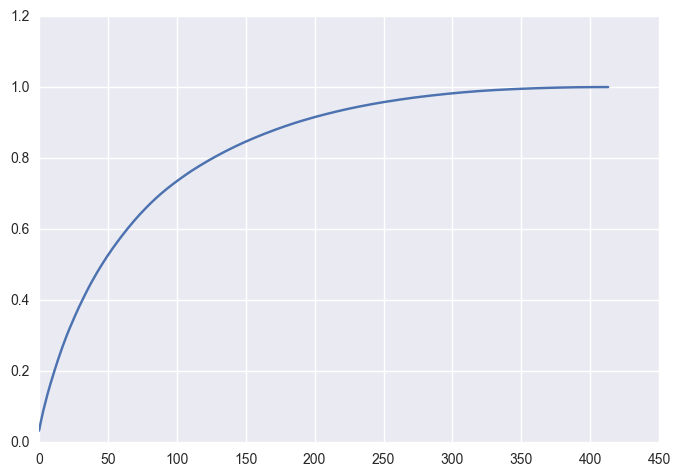

In [9]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [10]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.79550690322054018

In [11]:
# Initialize PCA transformation, only keeping 125 components

pca = PCA(n_components = 125)

# Fit and transform item_data_scaled
pca.fit(item_data_scaled)

PC_items = pca.transform(item_data_scaled)

# Display shape of PC_items
PC_items[:5]

array([[  5.87613932e+00,   4.82892363e+00,  -4.95562763e-01,
          3.09384858e+00,  -6.33756725e-01,  -1.15340518e+01,
          2.16198779e+00,   7.11691210e+00,   5.33608625e+00,
          4.42433942e+00,   4.63707589e+00,   2.31655050e+00,
          1.23108274e+01,   1.98670538e+00,  -1.14310713e+01,
          5.61782303e+00,  -2.17736910e+00,   7.66596922e+00,
         -1.21362229e+01,  -1.60492289e+01,  -5.94889641e+00,
          7.81418686e+00,   4.05183338e+01,  -3.55738210e+01,
         -1.75581487e+01,   6.87031925e+00,   2.08869443e+01,
          2.29694405e+00,  -2.61609194e+01,  -3.25790120e+01,
          7.88219135e+00,   1.23602318e+01,   6.82504113e+00,
         -3.29592518e+01,  -4.40146211e+00,  -1.72391223e+01,
         -1.12725063e+01,  -1.44884360e+01,  -2.76582238e+00,
          4.73739505e+00,  -6.98280688e+00,  -1.46014320e+00,
          1.06016514e+01,   1.25043022e+00,   3.08641065e+00,
          5.33765391e+00,  -4.11450388e-01,   1.62496021e+00,
        

In [12]:
type(PC_items)

numpy.ndarray

In [13]:
print(PC_items.shape)
PC_items.shape[1]

(414, 125)


125

In [14]:
# Put PC_items into a dataframe

items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = [ 'PC{}' .format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876139,4.828924,-0.495563,3.093849,-0.633757,-11.534052,2.161988,7.116912,5.336086,4.424339,...,0.472311,0.548480,0.667170,0.511332,-0.094969,-0.862805,-0.004349,-0.796604,0.387505,0.012323
12348,-4.219841,1.226207,-1.881973,-0.174141,0.817732,1.160662,-0.871644,-0.846730,0.460376,0.853772,...,-0.811850,-0.026329,1.095149,-0.151482,-1.715995,1.567254,-0.589702,1.729490,1.032749,-0.936084
12349,-1.260832,2.387579,-0.073030,-1.119202,-0.034445,-3.714764,-0.343120,-0.149344,-0.790103,-0.380275,...,-1.344314,-1.834498,-0.554079,-4.364331,1.855118,-4.038638,-3.334203,0.096984,3.138745,3.946934
12350,-4.929321,-0.714915,-1.580923,-0.469786,-0.116053,0.647768,0.112827,-1.335688,1.546382,-1.189757,...,0.216627,0.521099,-0.340818,-1.734804,0.702641,-0.403931,-0.901435,-1.777776,0.868563,-2.465347
12352,-2.053103,2.110988,0.184946,0.127917,0.087689,-1.943928,2.383554,0.898990,-0.672349,0.081430,...,13.010588,1.807302,-8.157644,1.997146,-3.438207,-3.359599,2.474139,-2.869258,-2.433634,2.119958


In [15]:
# Save pca_item_data.csv
items_pca.to_csv('./pca_item_data.csv')